# Synthetic Signal Analysis with EMD and HT (HHT) 

* Run EMD on your signal under different tuning conditions of the algorithm and observe the results: 

    * At least two different splines: Natural and Hermite
    * Set different stopage criteria: sifting number=10, run until the default version of the algorithm stops
    * Run FFT on each IMF
    * Compute the IF with HT on each IMF
* Repeat the above with added noise and offset and observe the results 

Note: run the step by step version of the algorithm where you start with the extrema, envelope, mean envelope and the selection process of each of the IMF.  

In [19]:
%matplotlib notebook

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

### Plot of the original signal 

<IPython.core.display.Javascript object>


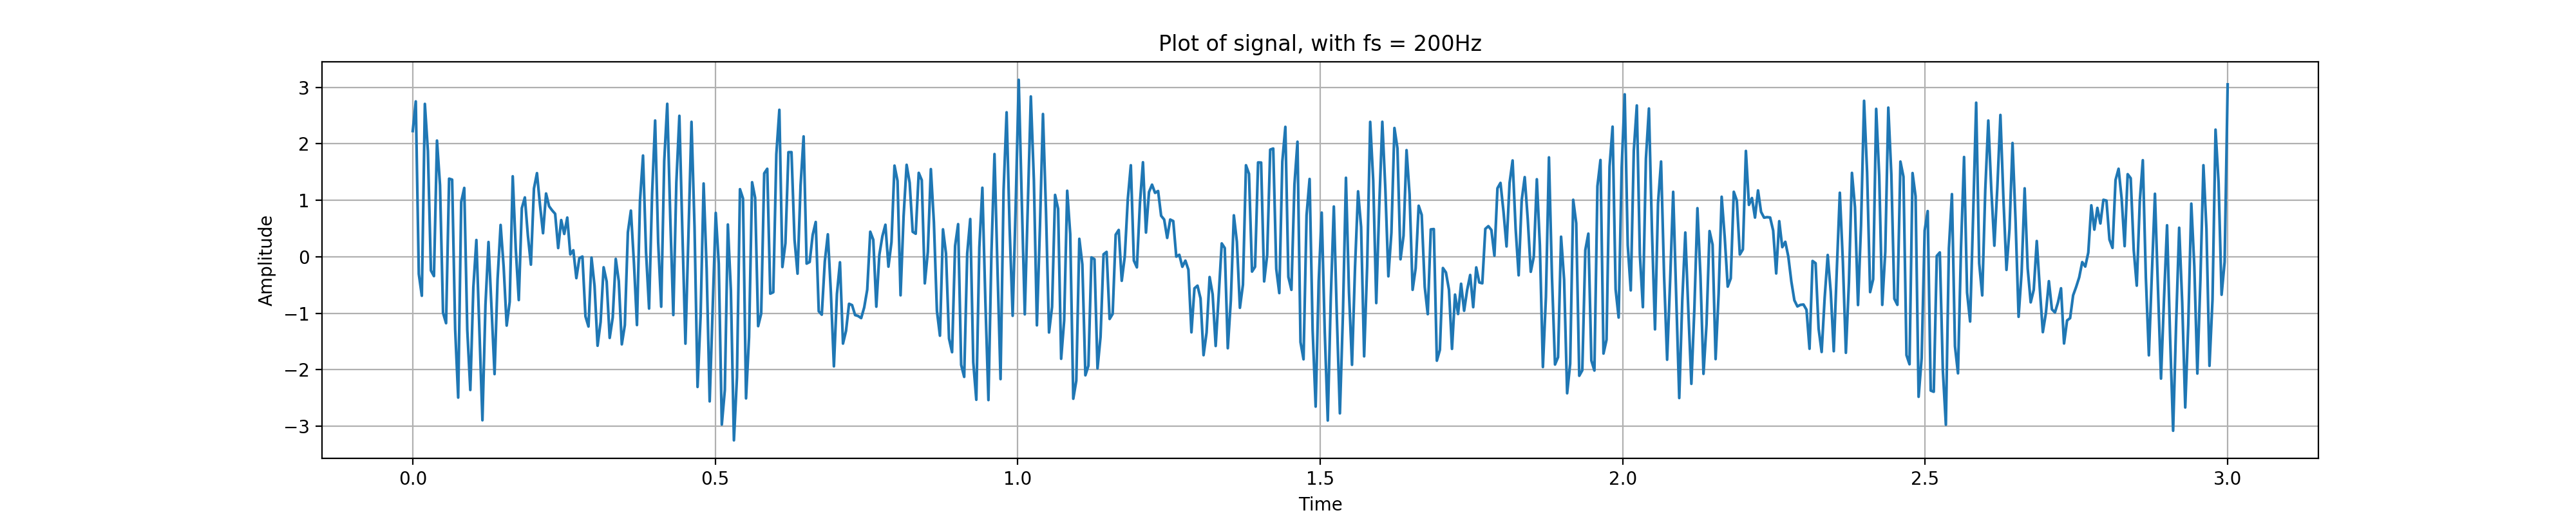

In [20]:
'''
Since the maximum frequency in our signal is 50Hz, then the sampeling 
frequency needs to be bigger than 2*50Hz => over 100Hz
'''
T0 = 3
fs = 200.0
T = 1.0/fs
N = int(T0 / T)



x = np.linspace(0.0, N*T, N)
noise = np.random.normal(0.0, N*T, N)*0.1
offset = np.pi / 3

y = np.sin(5.0 * 2.0*np.pi*x + offset) + np.sin(48.0 * 2.0*np.pi*x+ offset)+ np.sin(50.0 * 2.0*np.pi*x+ offset) +noise

plt.figure(figsize=(20, 4))
plt.plot(x, y)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('Plot of signal, with fs = 200Hz')
plt.grid()
plt.draw()

### EMD with a cubic spline

<IPython.core.display.Javascript object>


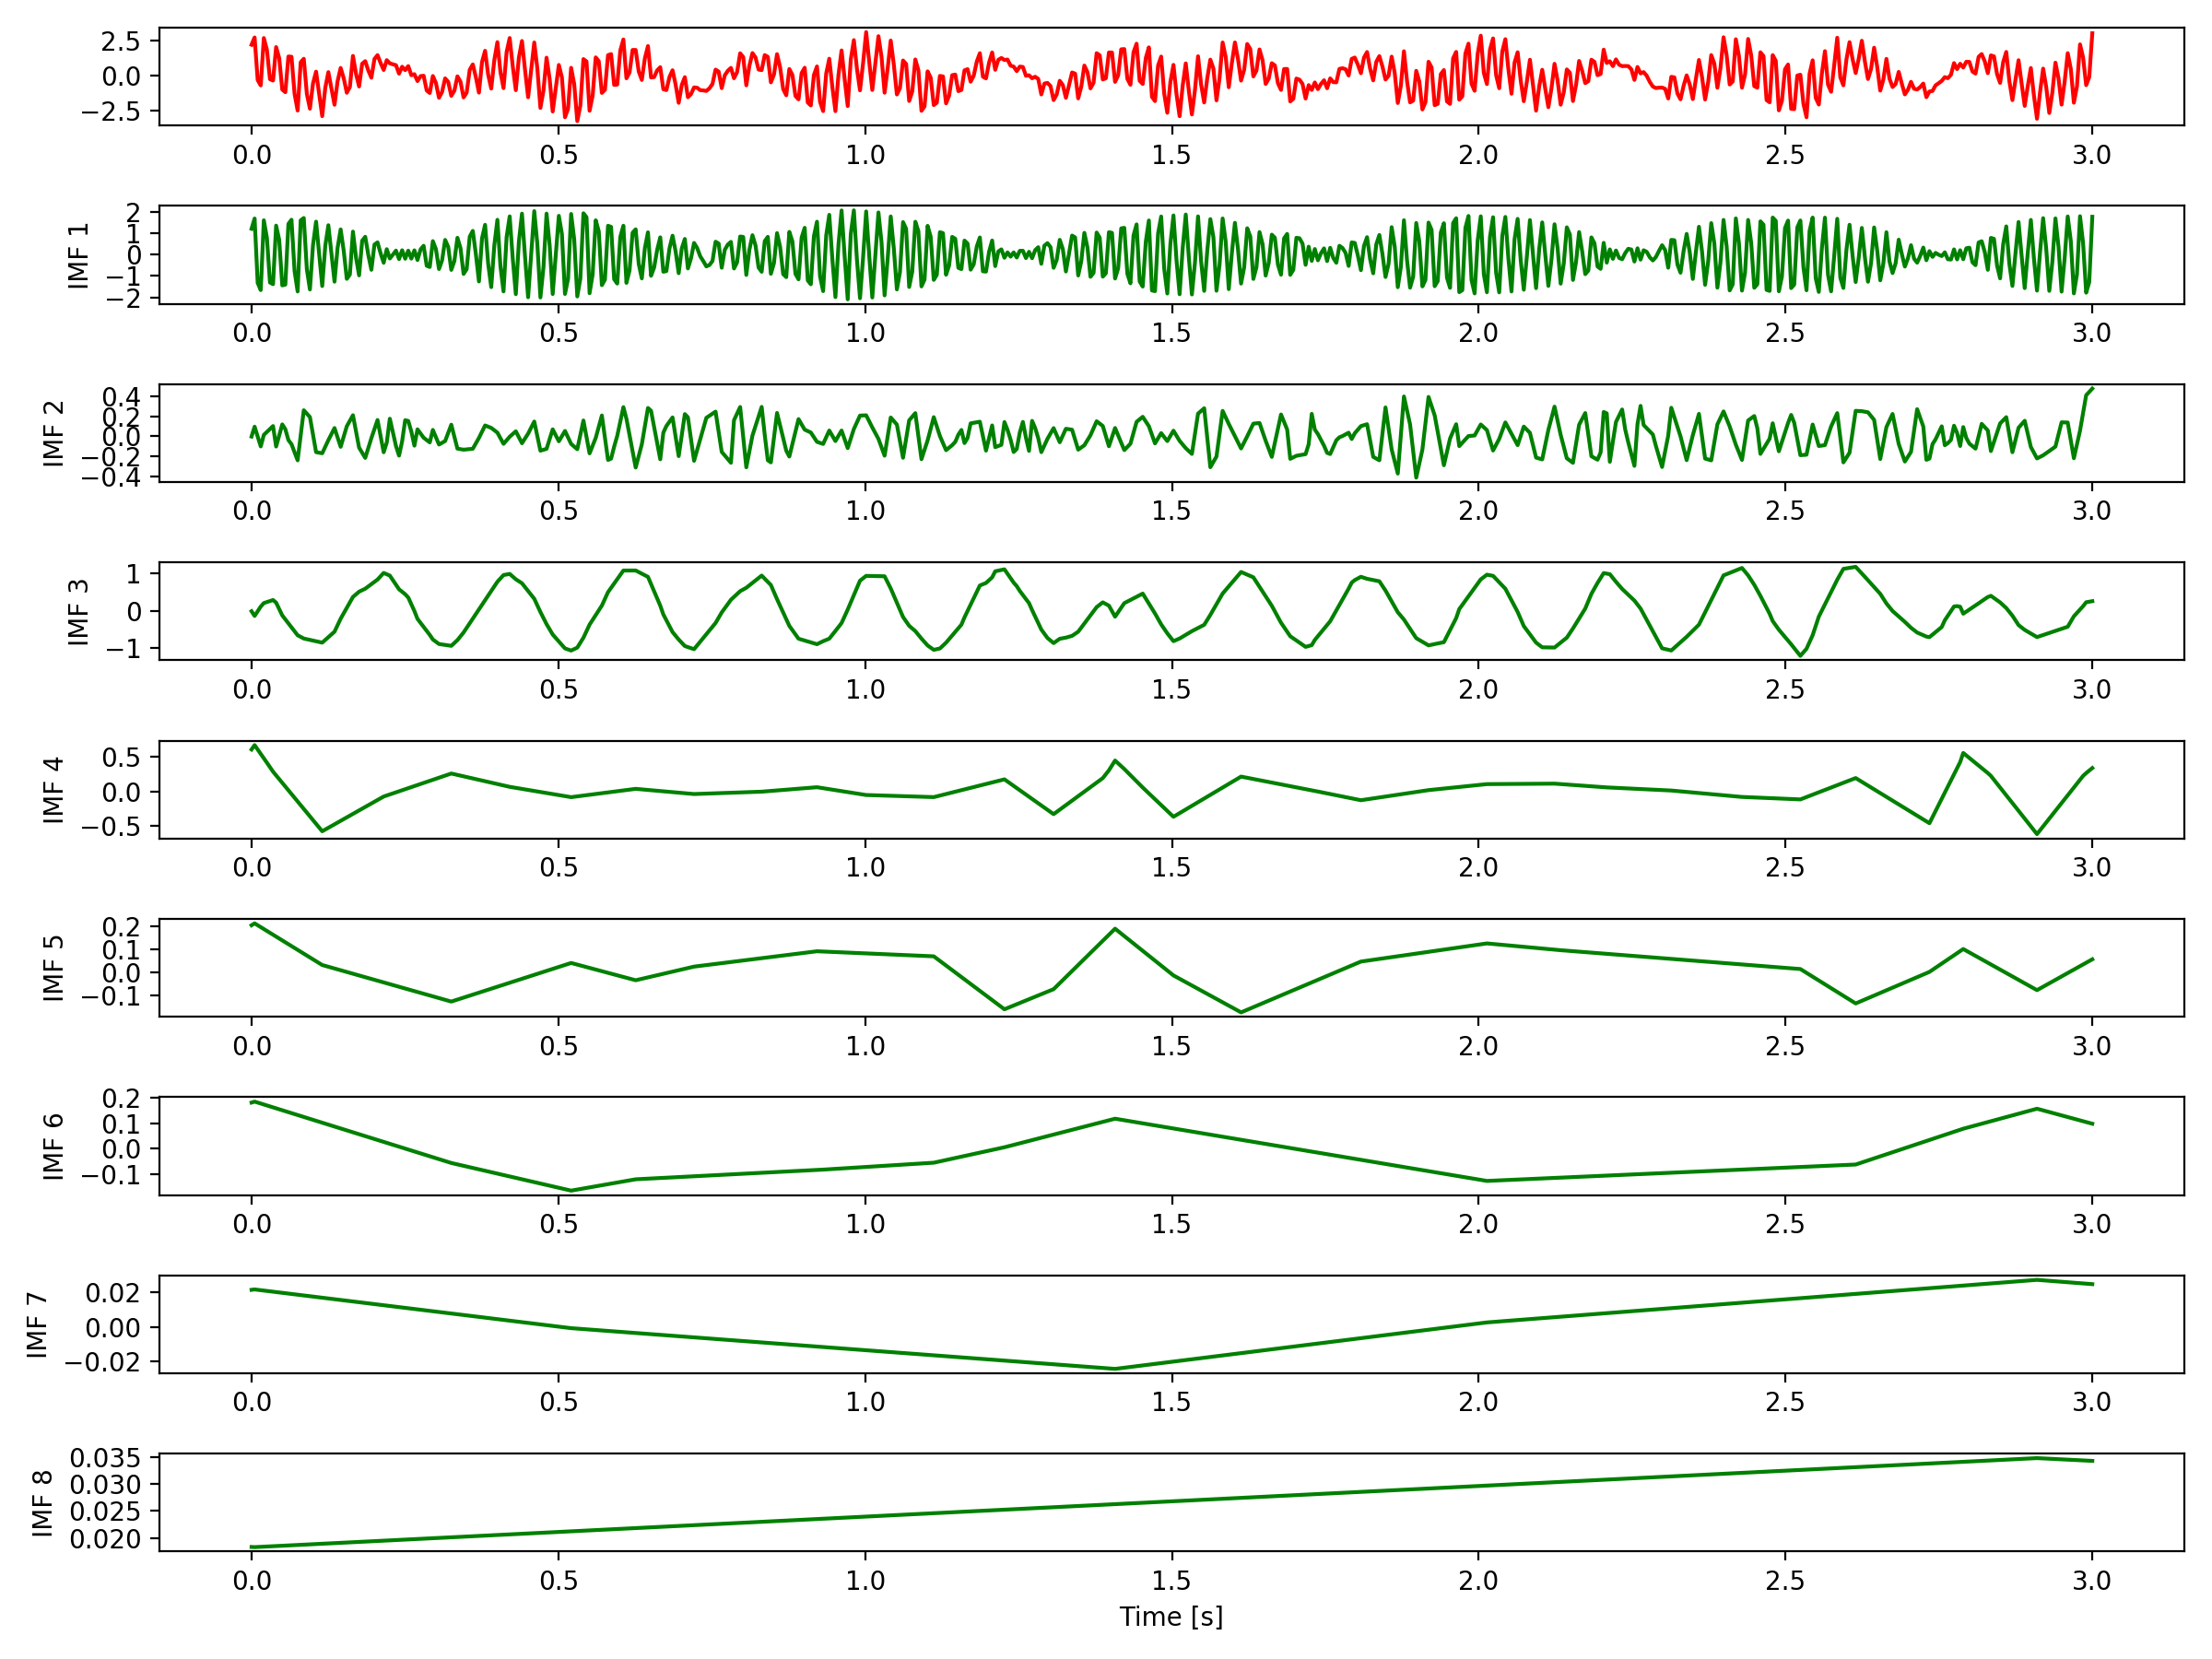

In [24]:
from PyEMD import EEMD
import numpy as np
import pylab as plt
from PyEMD import EMD

# Say we want detect extrema using parabolic method
emd = EMD()
emd.spline_kind="slinear"

# Execute EEMD on S
IMFs = emd.emd(y, x)
nIMFs = IMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(x, y, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(x, IMFs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

### EMD with a akima spline

<IPython.core.display.Javascript object>


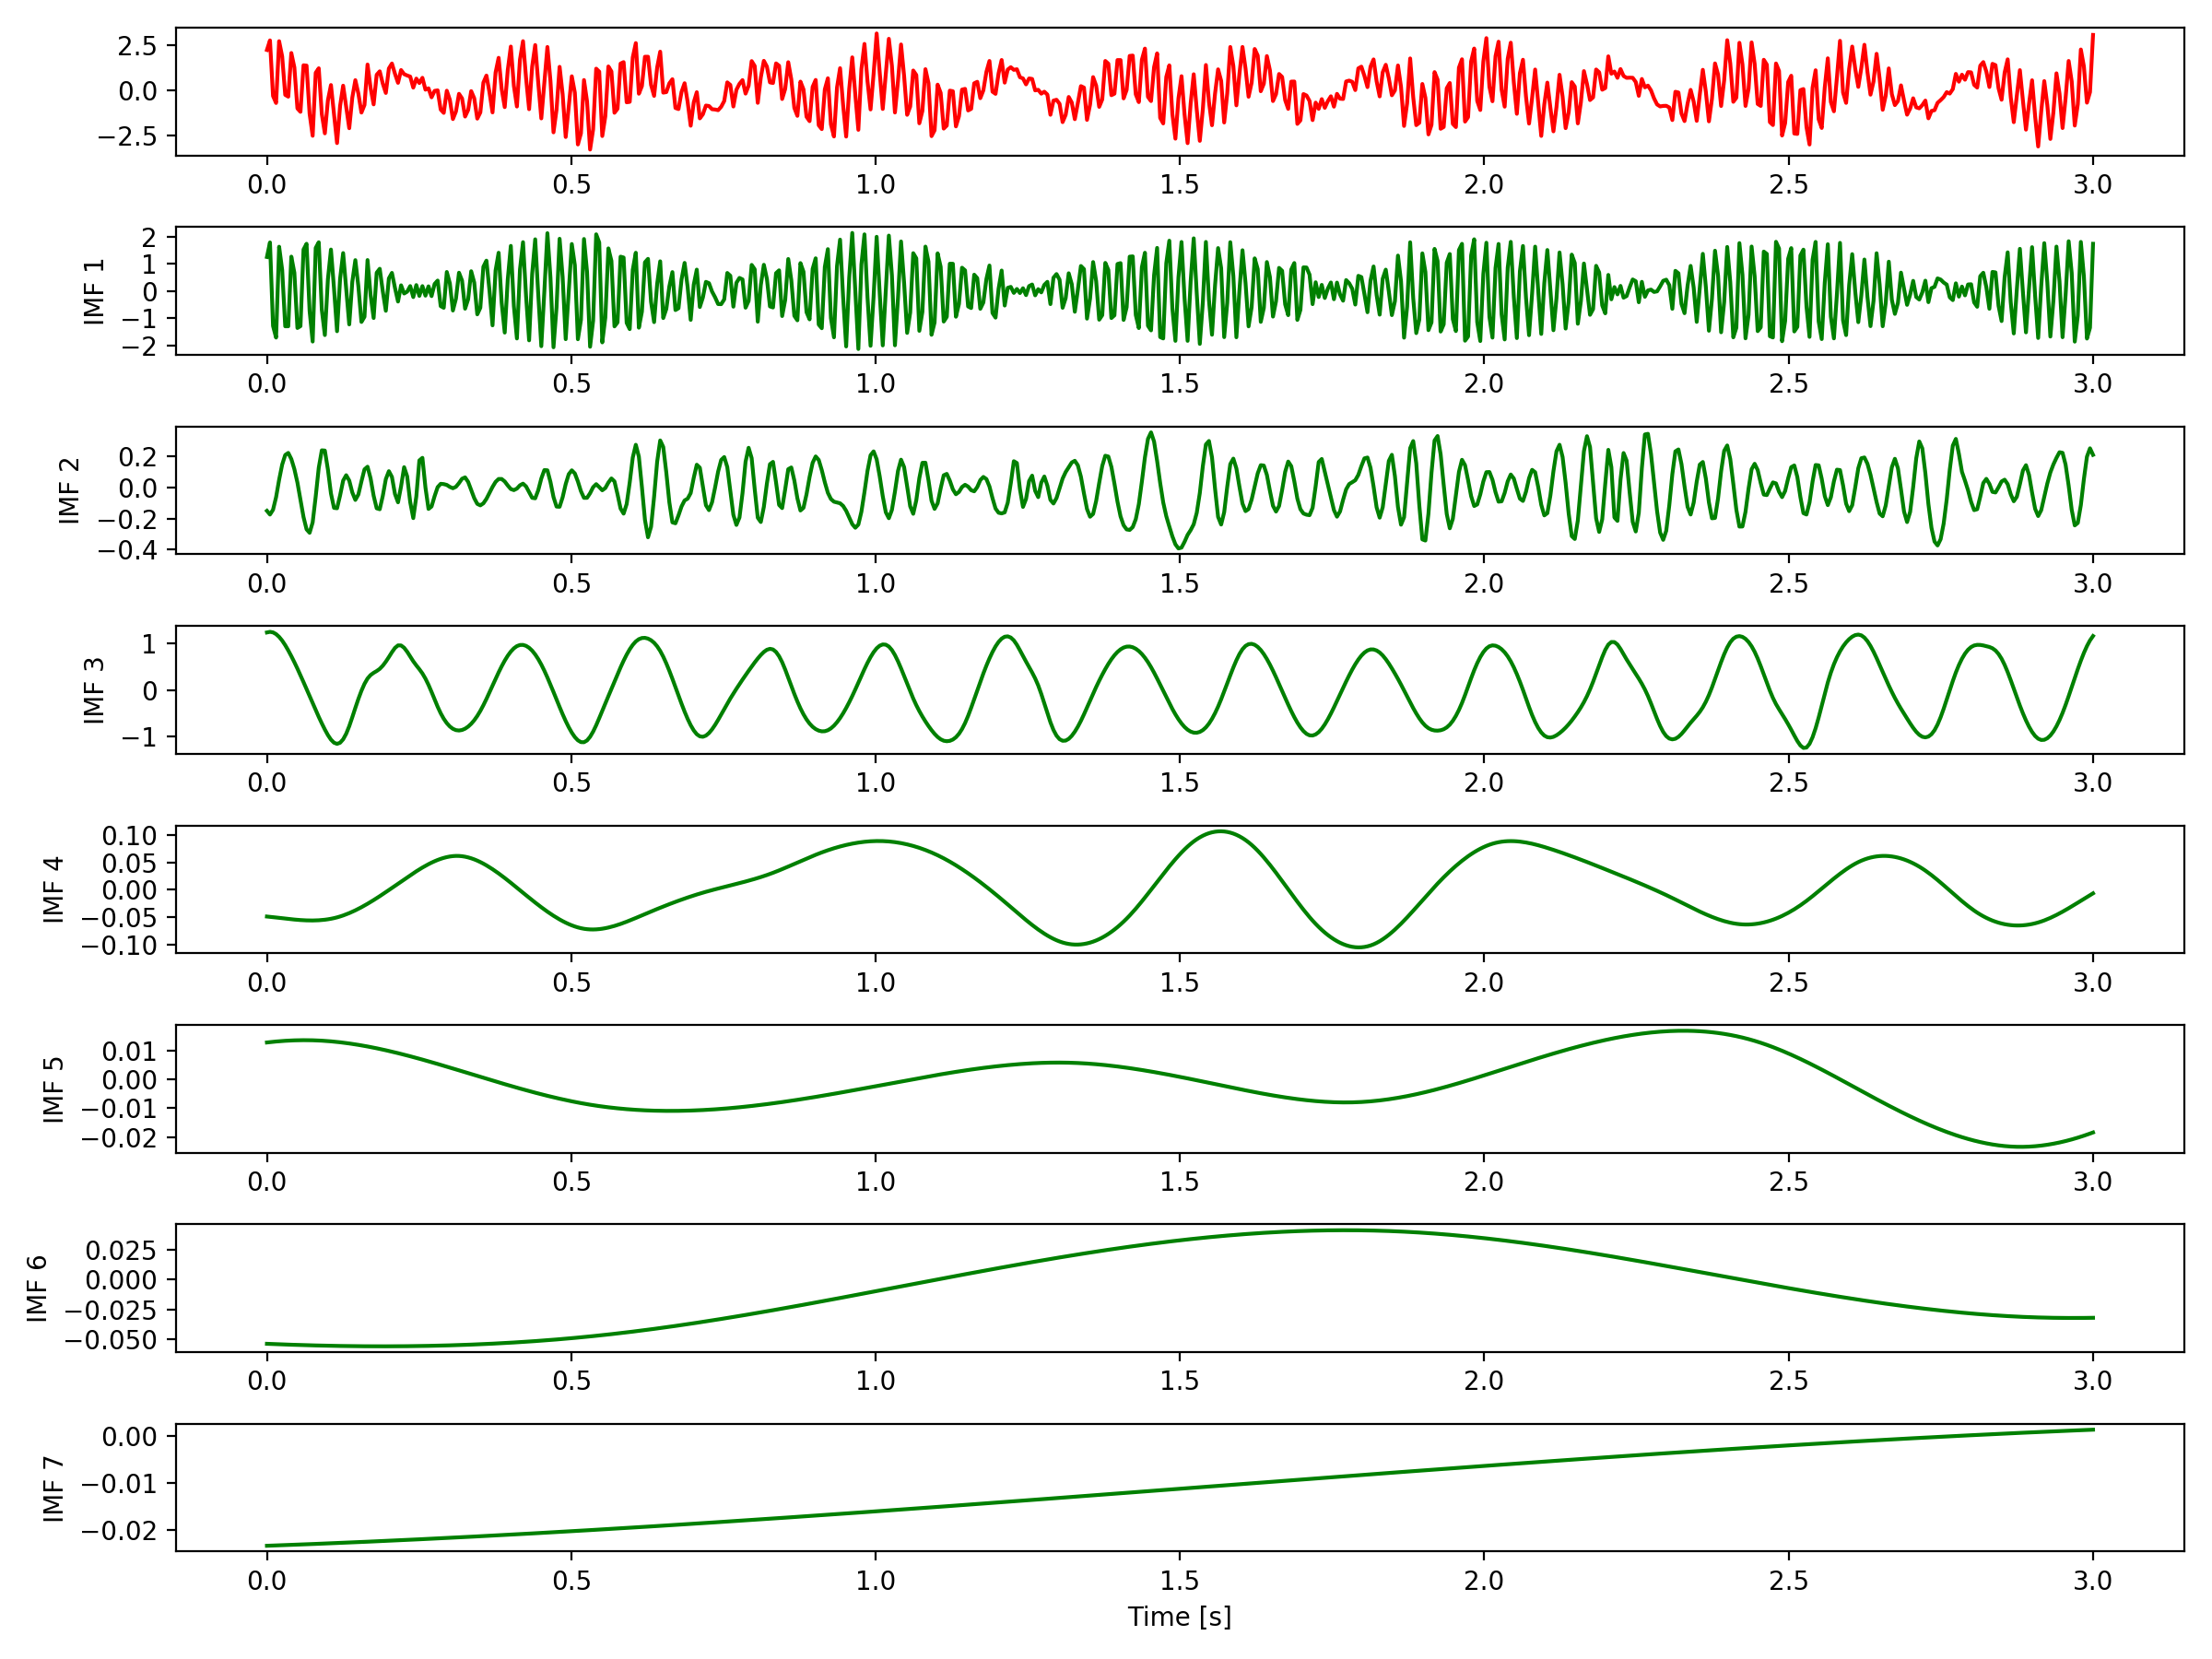

In [26]:

# Say we want detect extrema using parabolic method
emd = EMD()
emd.spline_kind="cubic"

# Execute EEMD on S
IMFs = emd.emd(y, x)
nIMFs = IMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(x, y, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(x, IMFs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()
plt.savefig('EMD_cubic.png', bbox_inches='tight')

### FFT of the IMF's (Using cubic spline)

<IPython.core.display.Javascript object>


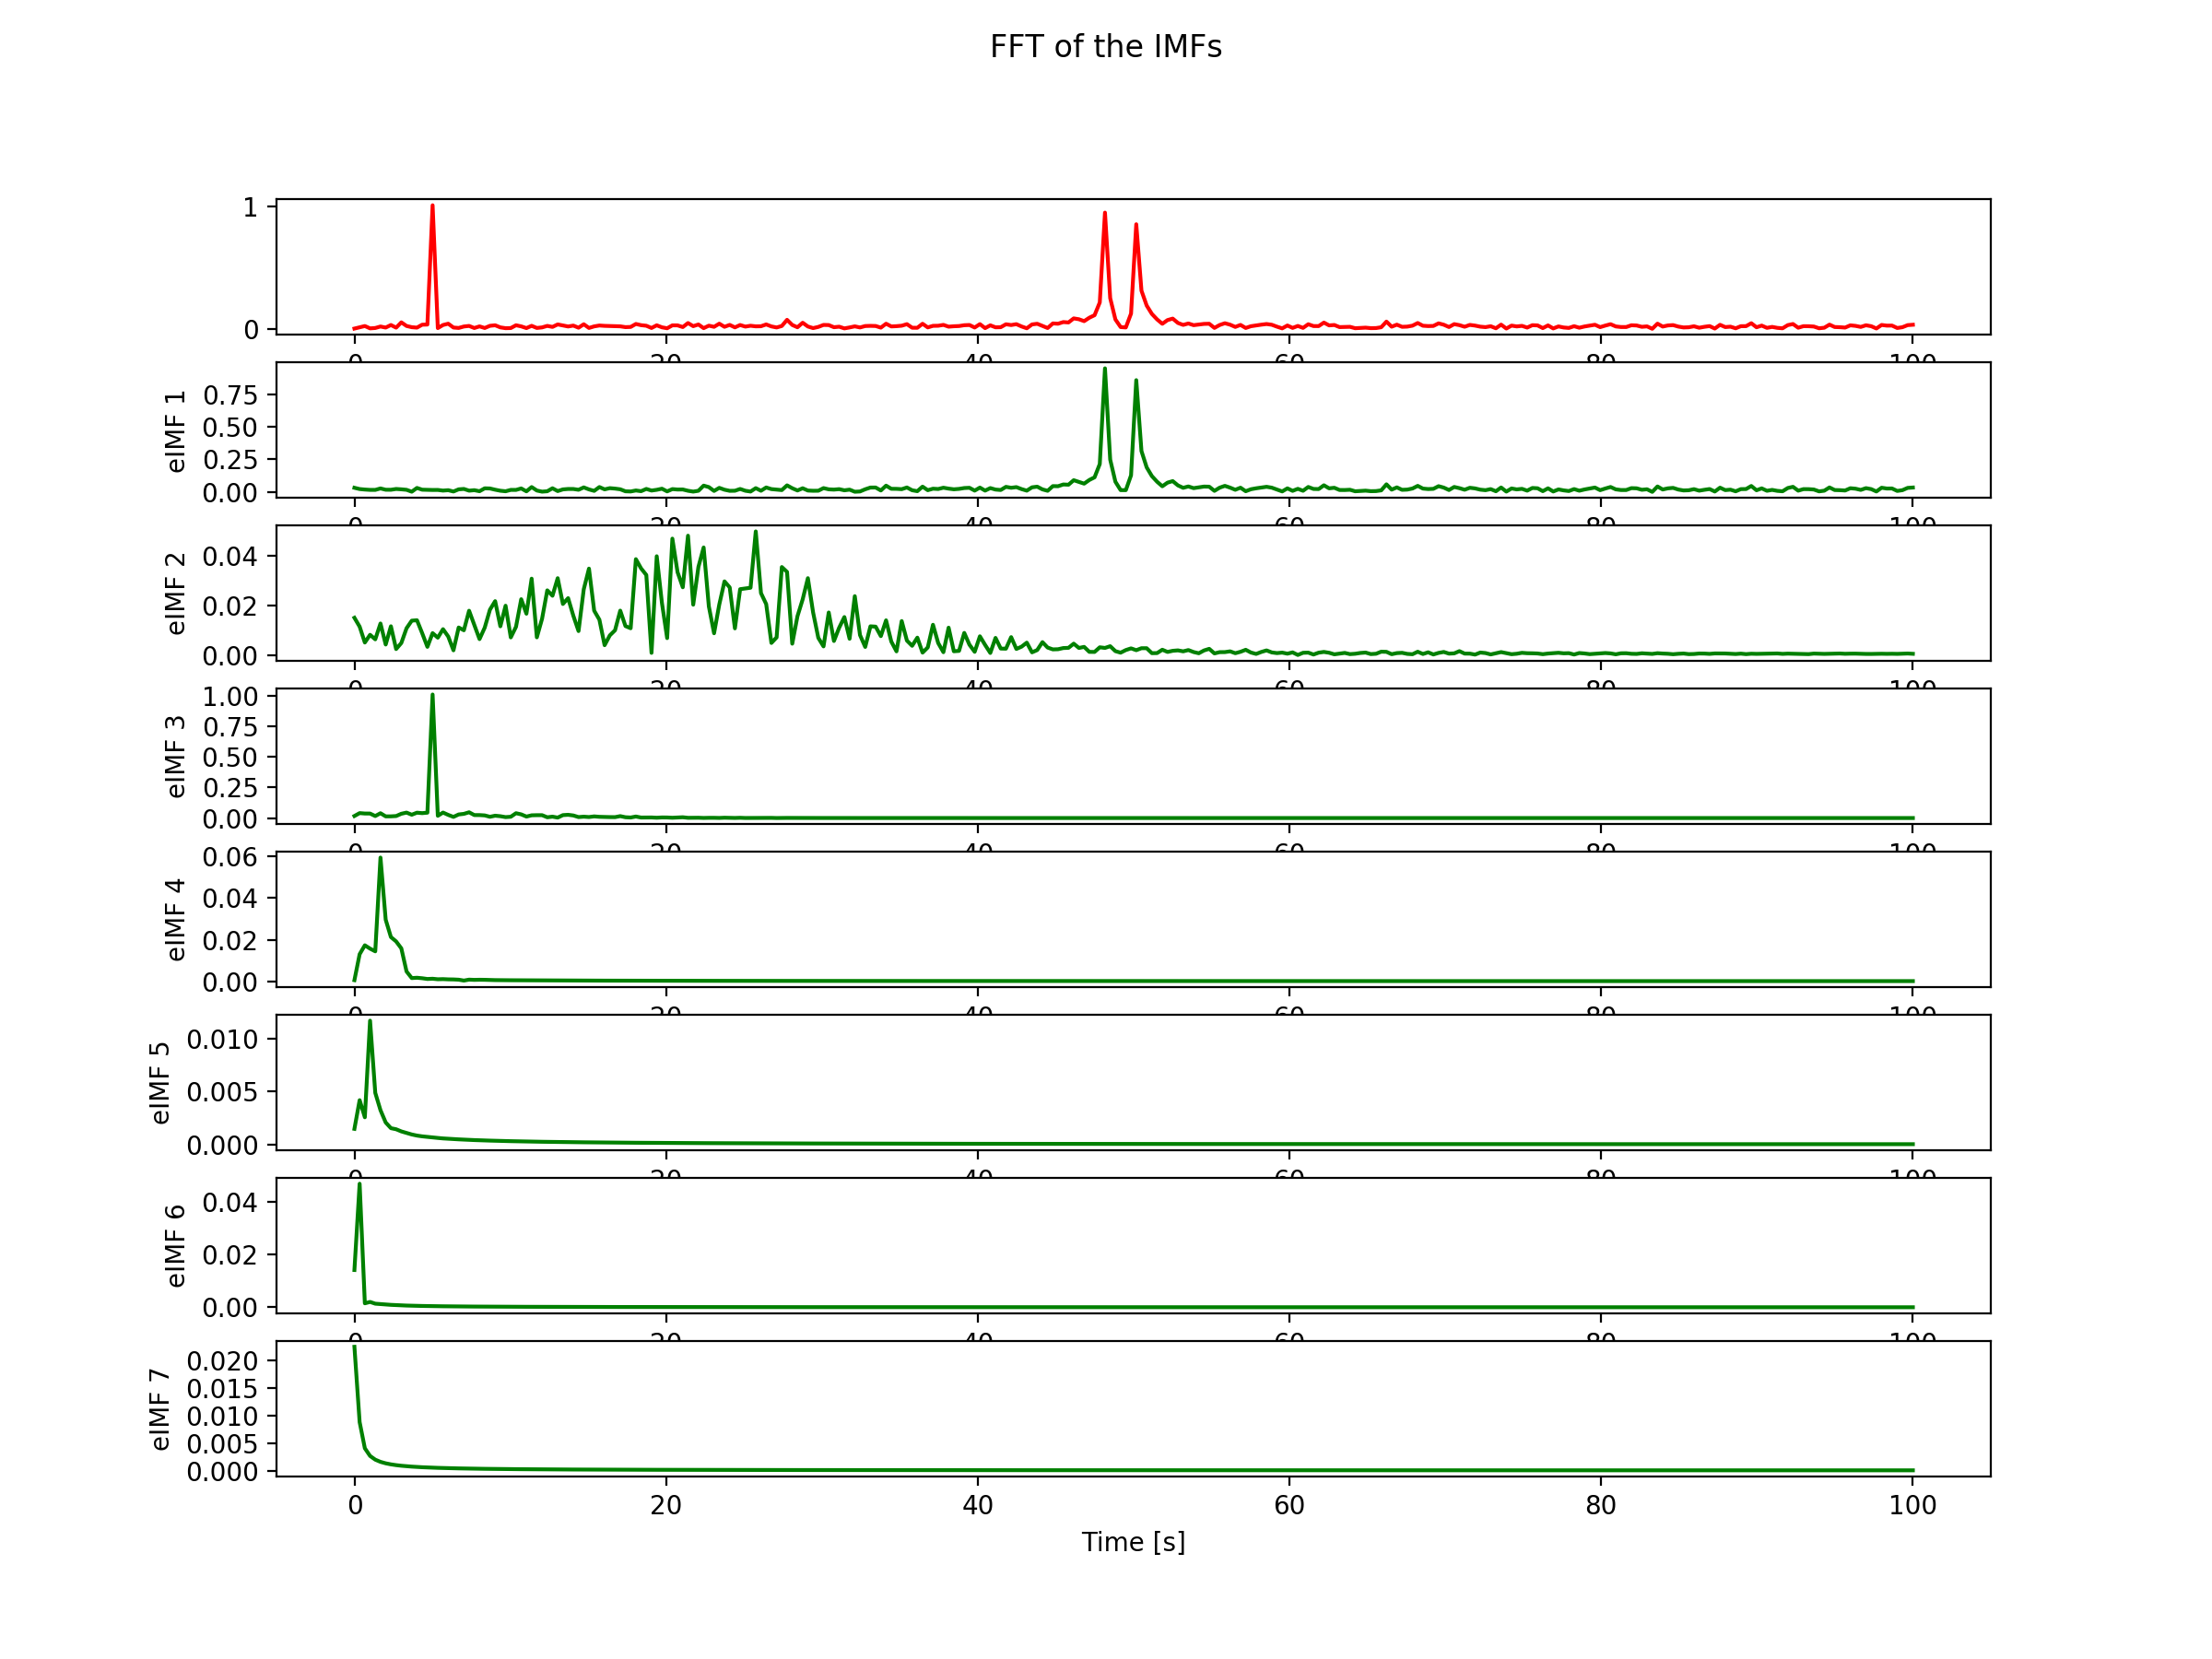

In [28]:
from scipy.fftpack import fft
yf = fft(y)

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# Plot results
plt.figure(figsize=(12,9))


plt.subplot(nIMFs+1, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'r')

for n in range(nIMFs):
    yf = fft(IMFs[n])

    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.xlabel('Time [s]')
    plt.locator_params(axis='y', nbins=5)
plt.suptitle('FFT of the IMFs')
plt.savefig('EMD_FFT.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


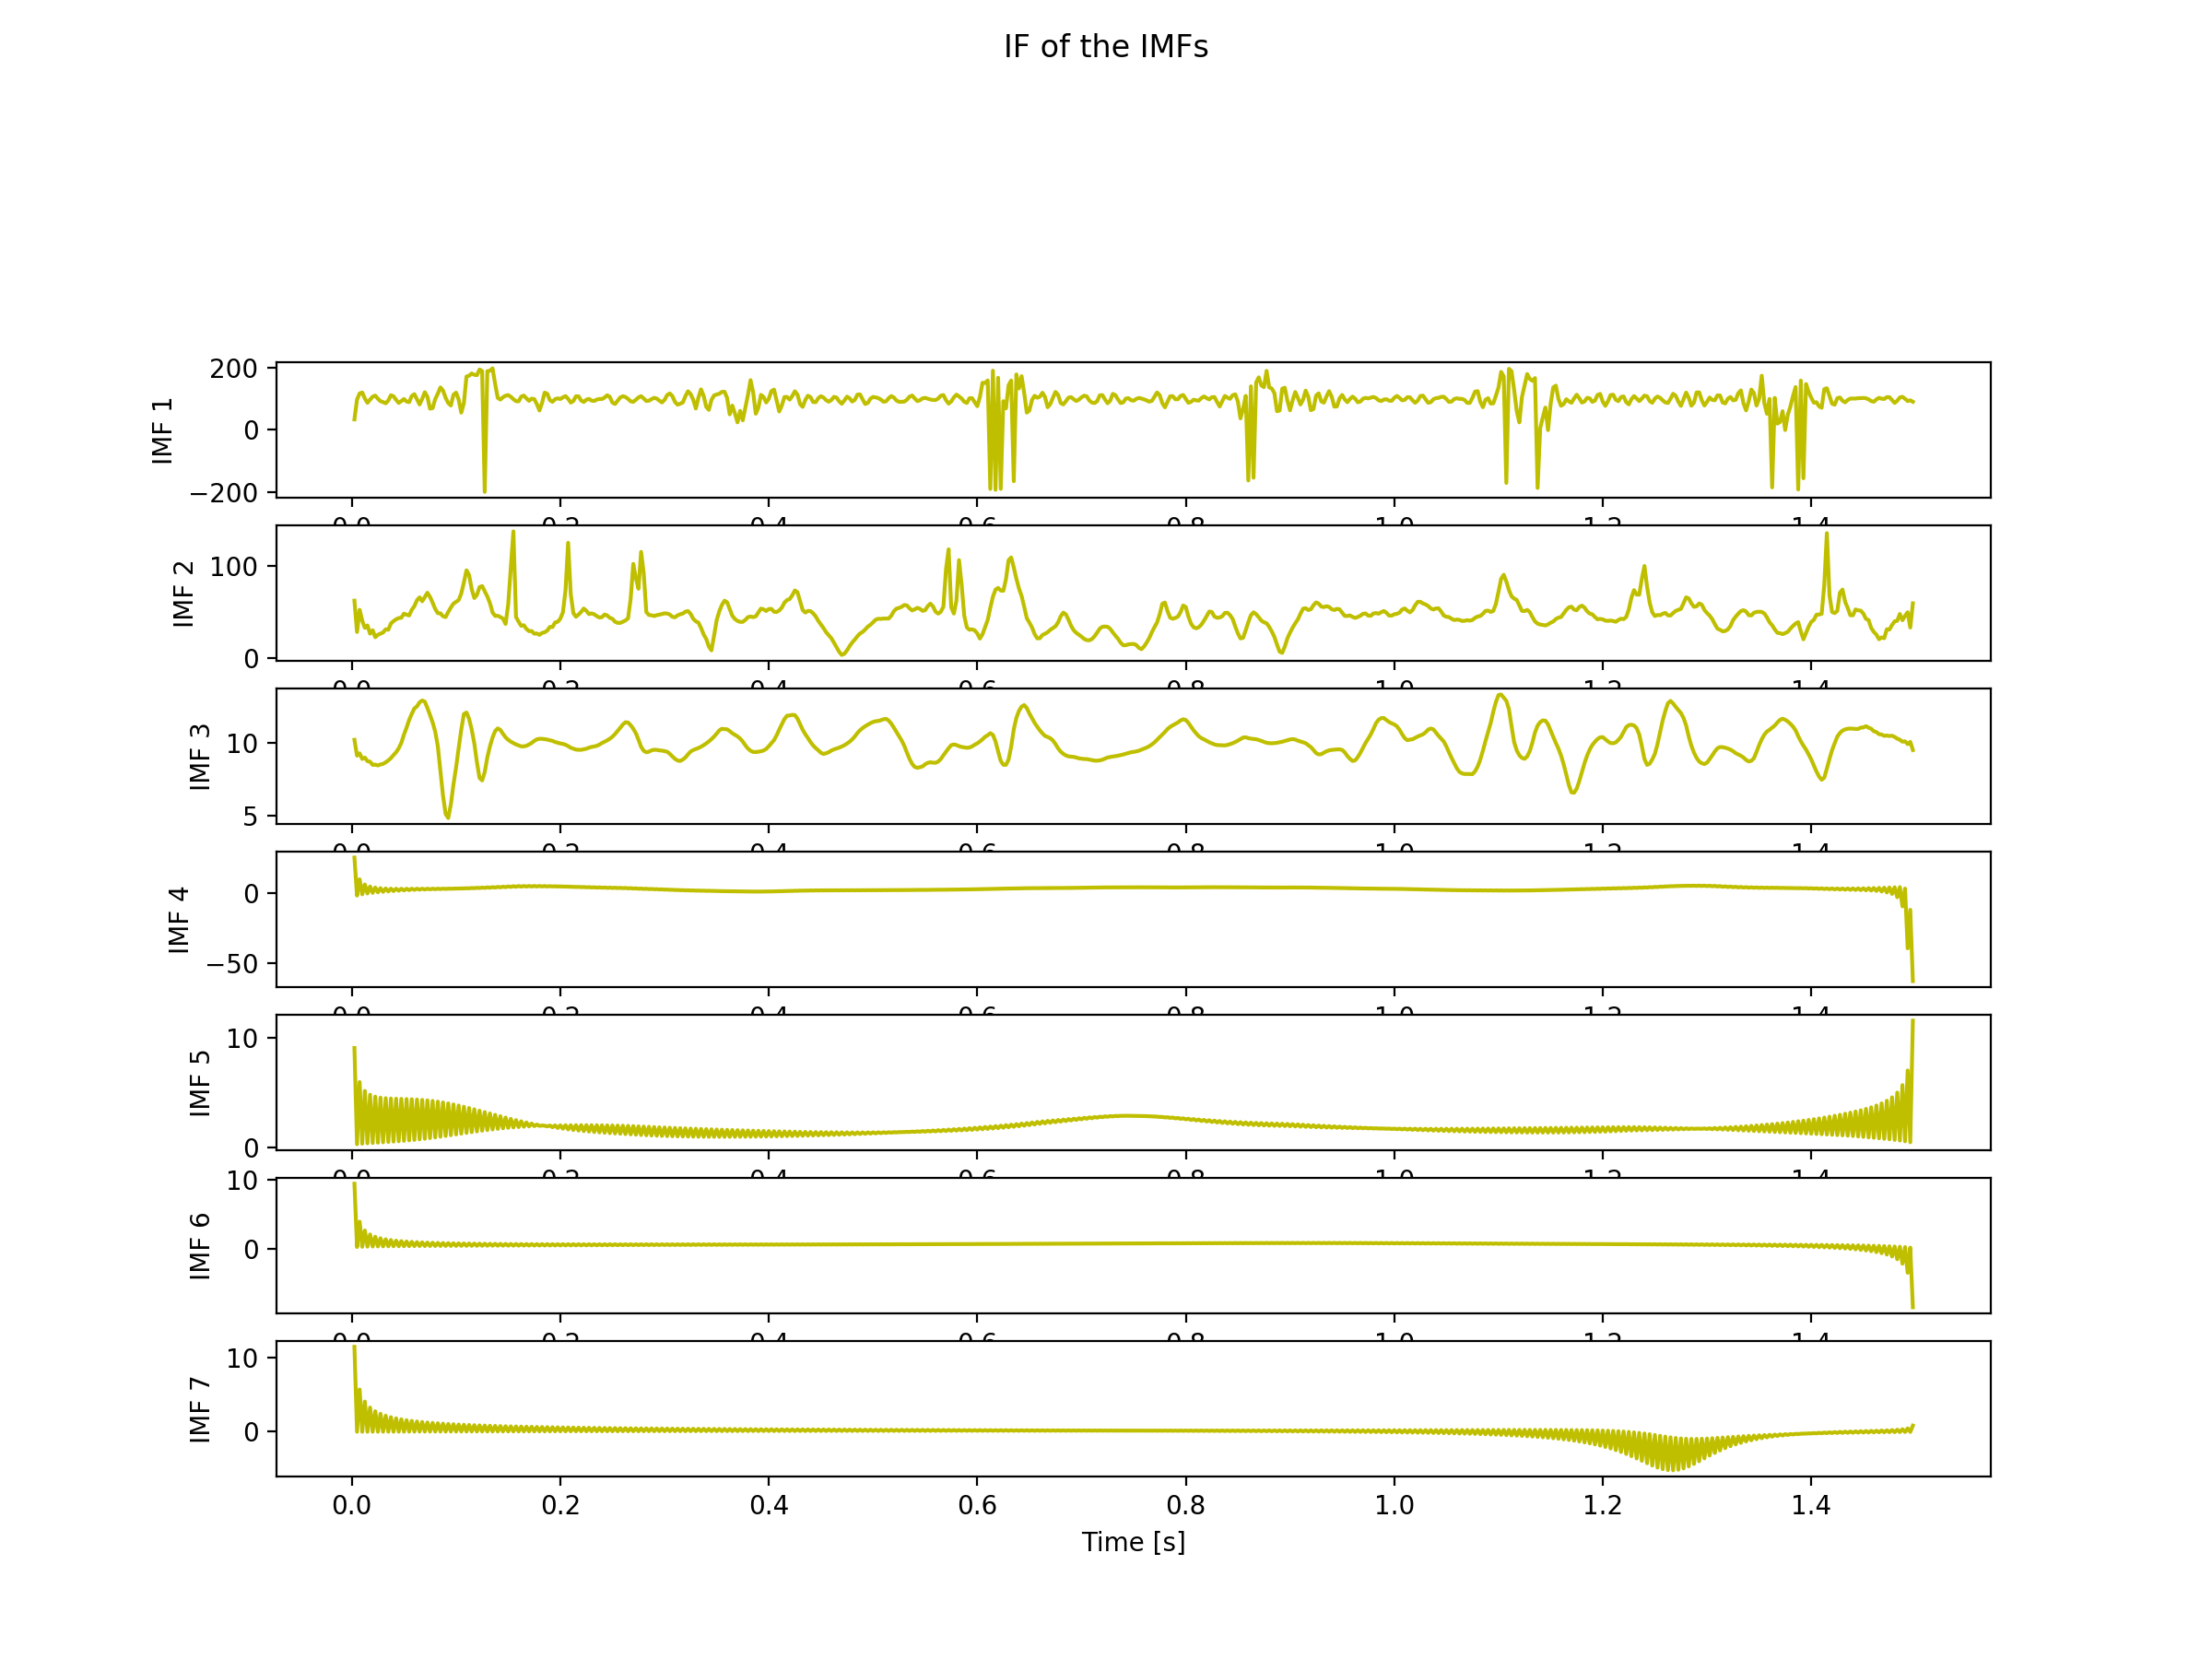

In [30]:
def hilb(s, unwrap=False):
    from scipy.signal import hilbert
    H = hilbert(s)
    amp = np.abs(H)
    phase = np.arctan2(H.imag, H.real)
    if unwrap: phase = np.unwrap(phase)
    return amp, phase

from scipy.signal import hilbert
duration = 2.0
fs = 400.0
samples = 600
t = np.arange(samples) / fs

plt.figure(figsize=(12,9))


for n in range(nIMFs):
    #inst_amp, phase = hilb(IMFs[n], unwrap=True)
    #inst_freq = np.diff(phase)
    #instf, timestamps = inst_freq(IMFs[n])
    #plt.plot(timestamps, instf)
    analytic_signal = hilbert(IMFs[n])
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi) * fs)
    #print(instantaneous_frequency.shape)
    
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t[1:], instantaneous_frequency, 'y')
    plt.ylabel("IMF %i" %(n+1))
    plt.xlabel('Time [s]')
    
plt.suptitle('IF of the IMFs')
plt.savefig('EMD_IF.png', bbox_inches='tight')